<a href="https://colab.research.google.com/github/brilli44/PCVK_ganjil_24/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Brilliantna Salsabila
## Kelas : TI 3B / 04

In [ ]:
LINK COLAB : https://colab.research.google.com/drive/1nQoyiMuMuazucvb_YL3JBlPqMiHFQbzb?usp=sharing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


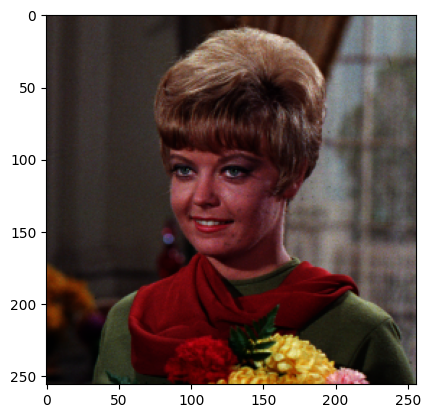

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

## Tugas Praktikum

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


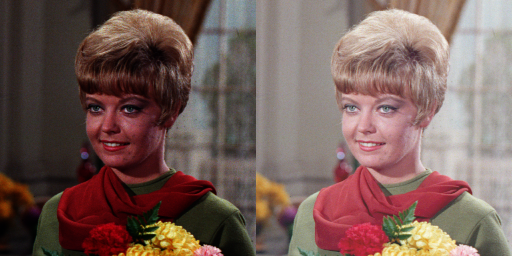

In [3]:
# 1.  Buat Gamma Correction
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Image Depth pada citra
----------------------


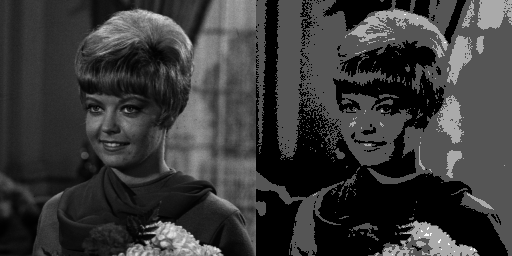

In [4]:
# 2. Buat Simulasi Image Depth
print('Image Depth pada citra')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)


# Nilai PSNR dengan 5


Nilai PSNR dengan 5 citra:  27.531300512726954 dB


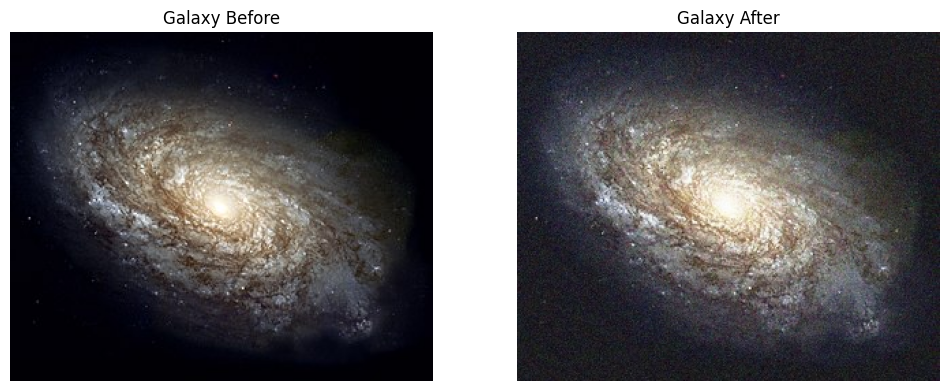

In [ ]:
import glob
import cv2
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek jika citra asli berhasil dibaca
if original_img is None:
    print("Gambar asli tidak berhasil dibaca.")
    exit()

# Membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:  # Pastikan gambar tidak None
        cv_img.append(n)
    else:
        print(f"Gambar {img} tidak berhasil dibaca.")

# Cek jika ada gambar noise yang berhasil dibaca
if len(cv_img) == 0:
    print("Tidak ada gambar noise yang ditemukan.")
    exit()

# Resize semua gambar agar memiliki ukuran yang sama dengan gambar asli
cv_img_resized = [cv2.resize(n, (original_img.shape[1], original_img.shape[0])) for n in cv_img]

# Inisialisasi denoised_img
denoised_img = np.zeros(original_img.shape, dtype=np.float32)  # Gunakan float32 untuk menghindari overflow
jmlGambar = min(5, len(cv_img_resized))  # Gunakan jumlah gambar yang tersedia

for i in range(jmlGambar):
    denoised_img += cv_img_resized[i].astype(np.float32)  # Konversi ke float32

# Rata-rata gambar
denoised_img = denoised_img / jmlGambar

# Konversi kembali ke uint8
denoised_img = np.uint8(denoised_img)

# Menghitung PSNR
psnr = PSNR(original_img, denoised_img)

print('Nilai PSNR dengan', jmlGambar, 'citra: ', psnr, 'dB')

# Menampilkan gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy Before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()


# Nilai PSNR dengan 10

Nilai PSNR dengan 10 citra :  19.722628285351927  dB


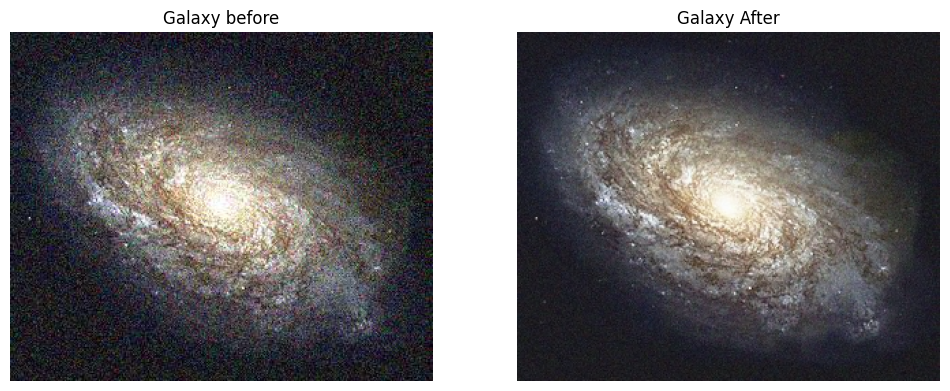

In [ ]:

# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 10 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

# Nilai PSNR dengan 20

Nilai PSNR dengan 20 citra: 27.52 dB


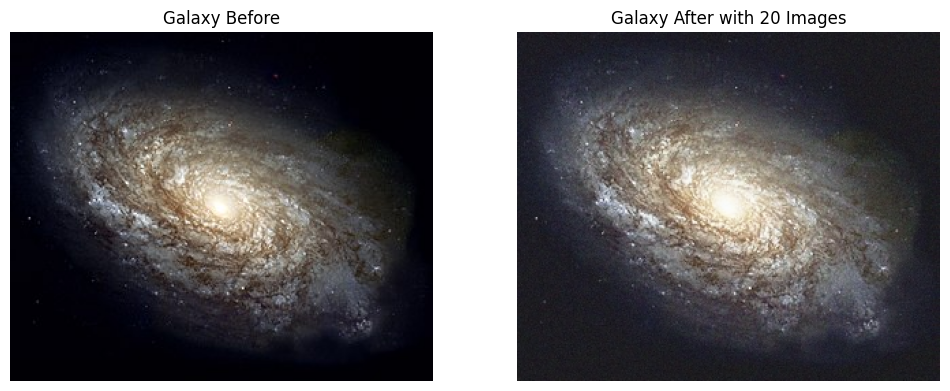

In [ ]:
import glob
import cv2
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek jika citra asli berhasil dibaca
if original_img is None:
    print("Gambar asli tidak berhasil dibaca.")
    exit()

# Membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:  # Pastikan gambar tidak None
        cv_img.append(n)

# Cek jika ada gambar noise yang berhasil dibaca
if len(cv_img) == 0:
    print("Tidak ada gambar noise yang ditemukan.")
    exit()

# Resize semua gambar agar memiliki ukuran yang sama dengan gambar asli
cv_img_resized = [cv2.resize(n, (original_img.shape[1], original_img.shape[0])) for n in cv_img]

# Menggunakan 20 gambar untuk menghitung PSNR
jmlGambar = 20
current_count = min(jmlGambar, len(cv_img_resized))

# Inisialisasi denoised_img
denoised_img = np.zeros(original_img.shape, dtype=np.float32)

for i in range(current_count):
    denoised_img += cv_img_resized[i].astype(np.float32)  # Konversi ke float32

# Rata-rata gambar
denoised_img = denoised_img / current_count

# Konversi kembali ke uint8
denoised_img = np.uint8(denoised_img)

# Menghitung PSNR
psnr = PSNR(original_img, denoised_img)

print(f'Nilai PSNR dengan {current_count} citra: {psnr:.2f} dB')

# Menampilkan gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy Before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title(f'Galaxy After with {current_count} Images')
plt.axis('off')

plt.show()


# Nilai PSNR dengan 40

Nilai PSNR dengan 40 citra: 54.92 dB


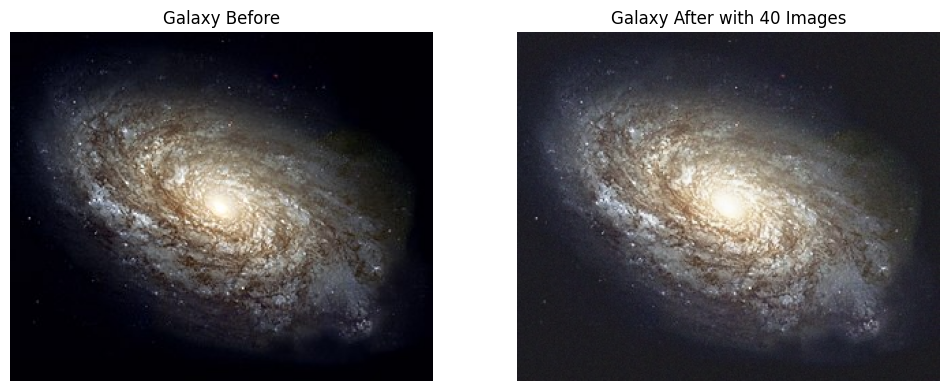

In [ ]:
import glob
import cv2
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 40 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek jika citra asli berhasil dibaca
if original_img is None:
    print("Gambar asli tidak berhasil dibaca.")
    exit()

# Membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:  # Pastikan gambar tidak None
        cv_img.append(n)

# Cek jika ada gambar noise yang berhasil dibaca
if len(cv_img) == 0:
    print("Tidak ada gambar noise yang ditemukan.")
    exit()

# Resize semua gambar agar memiliki ukuran yang sama dengan gambar asli
cv_img_resized = [cv2.resize(n, (original_img.shape[1], original_img.shape[0])) for n in cv_img]

jmlGambar = 40  # Menggunakan 40 gambar
current_count = min(jmlGambar, len(cv_img_resized))

if current_count < jmlGambar:
    print(f'Hanya ditemukan {current_count} gambar. Menggunakan jumlah yang tersedia untuk PSNR.')

# Inisialisasi denoised_img
denoised_img = np.zeros(original_img.shape, dtype=np.float32)

for i in range(current_count):
    denoised_img += cv_img_resized[i].astype(np.float32)  # Konversi ke float32

# Rata-rata gambar
denoised_img = denoised_img / current_count

# Konversi kembali ke uint8
denoised_img = np.uint8(denoised_img)

# Menghitung PSNR
psnr = PSNR(original_img, denoised_img)

print(f'Nilai PSNR dengan {current_count} citra: {psnr:.2f} dB')

# Menampilkan gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy Before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title(f'Galaxy After with {current_count} Images')
plt.axis('off')

plt.show()


# Nilai PSNR dengan 80

Nilai PSNR dengan 80 citra: 109.58 dB


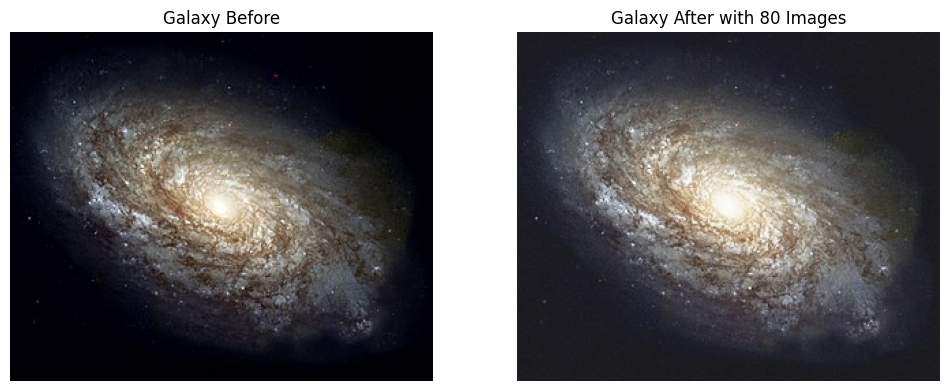

In [ ]:
import glob
import cv2
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 80 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek jika citra asli berhasil dibaca
if original_img is None:
    print("Gambar asli tidak berhasil dibaca.")
    exit()

# Membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:  # Pastikan gambar tidak None
        cv_img.append(n)

# Cek jika ada gambar noise yang berhasil dibaca
if len(cv_img) == 0:
    print("Tidak ada gambar noise yang ditemukan.")
    exit()

# Resize semua gambar agar memiliki ukuran yang sama dengan gambar asli
cv_img_resized = [cv2.resize(n, (original_img.shape[1], original_img.shape[0])) for n in cv_img]

jmlGambar = 80
current_count = min(jmlGambar, len(cv_img_resized))

if current_count < jmlGambar:
    print(f'Hanya ditemukan {current_count} gambar. Menggunakan jumlah yang tersedia untuk PSNR.')

# Inisialisasi denoised_img
denoised_img = np.zeros(original_img.shape, dtype=np.float32)

for i in range(current_count):
    denoised_img += cv_img_resized[i].astype(np.float32)  # Konversi ke float32

# Rata-rata gambar
denoised_img = denoised_img / current_count

# Konversi kembali ke uint8
denoised_img = np.uint8(denoised_img)

# Menghitung PSNR
psnr = PSNR(original_img, denoised_img)

print(f'Nilai PSNR dengan {current_count} citra: {psnr:.2f} dB')

# Menampilkan gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy Before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title(f'Galaxy After with {current_count} Images')
plt.axis('off')

plt.show()


# Nilai PSNR dengan 100

Nilai PSNR dengan 100 citra: 136.85 dB


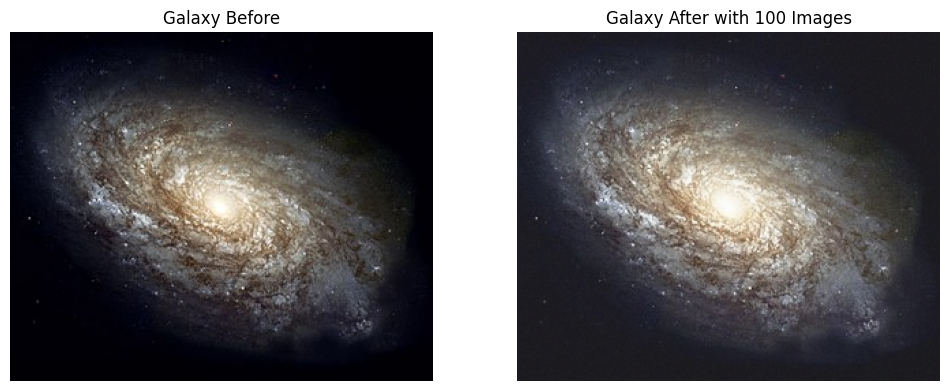

In [ ]:

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 100 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek jika citra asli berhasil dibaca
if original_img is None:
    print("Gambar asli tidak berhasil dibaca.")
    exit()

# Membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:  # Pastikan gambar tidak None
        cv_img.append(n)

# Cek jika ada gambar noise yang berhasil dibaca
if len(cv_img) == 0:
    print("Tidak ada gambar noise yang ditemukan.")
    exit()

# Resize semua gambar agar memiliki ukuran yang sama dengan gambar asli
cv_img_resized = [cv2.resize(n, (original_img.shape[1], original_img.shape[0])) for n in cv_img]

jmlGambar = 100
current_count = min(jmlGambar, len(cv_img_resized))

if current_count < jmlGambar:
    print(f'Hanya ditemukan {current_count} gambar. Menggunakan jumlah yang tersedia untuk PSNR.')

# Inisialisasi denoised_img
denoised_img = np.zeros(original_img.shape, dtype=np.float32)

for i in range(current_count):
    denoised_img += cv_img_resized[i].astype(np.float32)  # Konversi ke float32

# Rata-rata gambar
denoised_img = denoised_img / current_count

# Konversi kembali ke uint8
denoised_img = np.uint8(denoised_img)

# Menghitung PSNR
psnr = PSNR(original_img, denoised_img)

print(f'Nilai PSNR dengan {current_count} citra: {psnr:.2f} dB')

# Menampilkan gambar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy Before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title(f'Galaxy After with {current_count} Images')
plt.axis('off')

plt.show()


# Menggunakan operator and

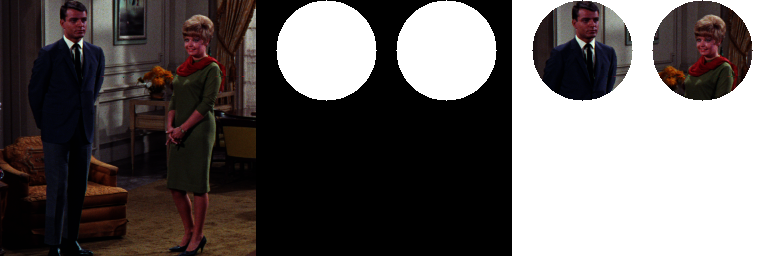

In [ ]:
# menggunakan operator and
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

# Menggunakan operator or

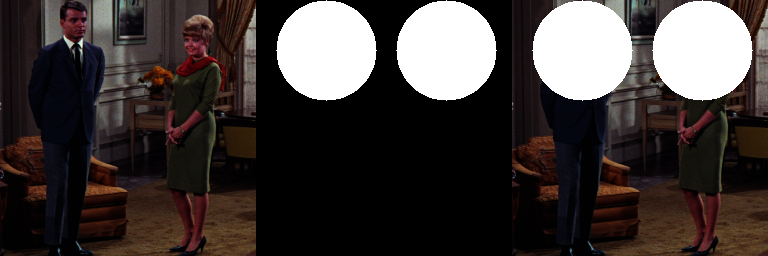

In [ ]:

# menggunakan operator or
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape, img.dtype)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = img | mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

# Menggunakan operator not

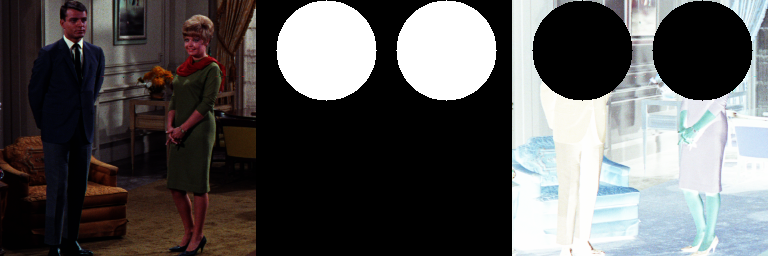

In [ ]:
# menggunakan operator not
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

# Menggunakan operator nand

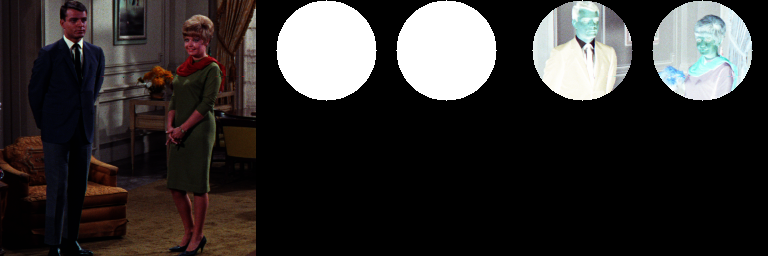

In [ ]:
# menggunakan operator nand
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

# Menggunakan operator xor

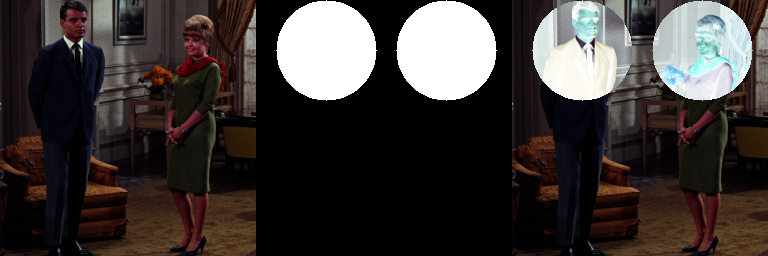

In [ ]:
# menggunakan operator xor
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)